In [3]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

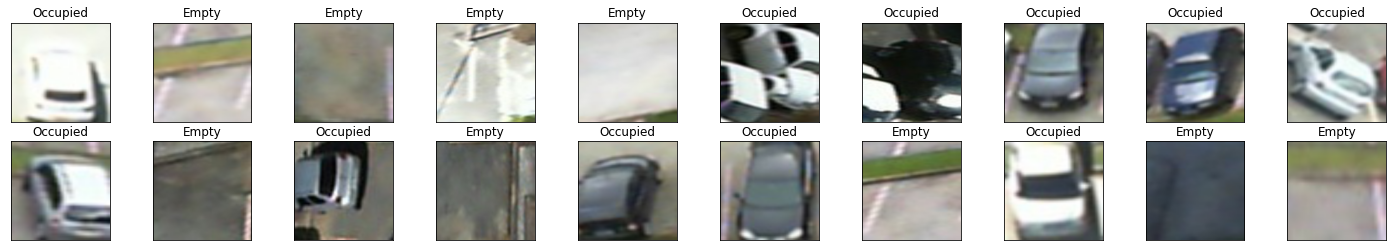

In [16]:
# location on Google Drive
test_p = './test'
batch_size = 32
num_workers = 1
classes = ["Empty", "Occupied"]

transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])
test_s = torchvision.datasets.ImageFolder(test_p, transform=transform)
test_loader = torch.utils.data.DataLoader(test_s, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Verification
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

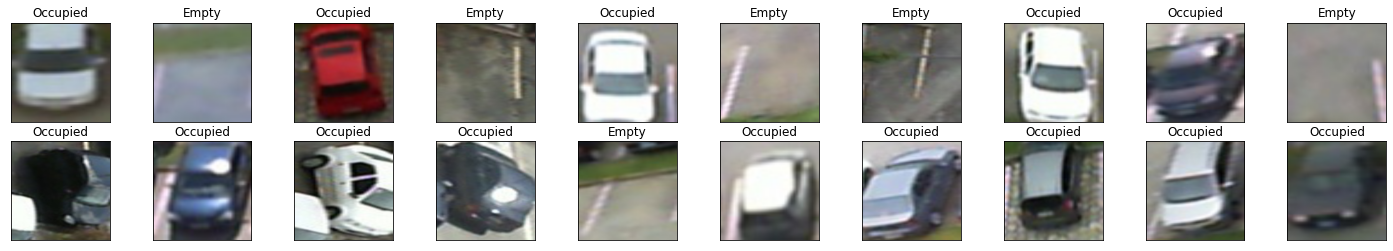

In [17]:
data = './train_validation'
batch_size = 32
num_workers = 1
classes = ["Empty", "Occupied"]

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
data = torchvision.datasets.ImageFolder(data, transform=transform)
# Split into train and validation
np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
relevant_indices = [i for i in range(len(data))]
np.random.shuffle(relevant_indices)
split = int(len(data) * 0.66) #split at 66%
# split into training and validation indices
relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
train_sampler = SubsetRandomSampler(relevant_train_indices)
train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size,
                                           num_workers=1, sampler=train_sampler)
val_sampler = SubsetRandomSampler(relevant_val_indices)
val_loader = torch.utils.data.DataLoader(data, batch_size=batch_size,
                                          num_workers=1, sampler=val_sampler)

# Verification Step
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])